# Veriyi tanıma

Bir e-ticaret şirketi müşterilerini segmentlere ayırıp bu segmentlere göre pazarlama stratejileri belirlemek istiyor. 

Bu probleme yönelik olarak ortak davranışlar sergileyenleri aynı gruplara alacağız ve pazarlama departmanı bu gruplar üzerinden bir kampanya stratejisi uygulayacak. 

Veri setimiz aşağıdaki değişkenleri içeriyor

InvoiceNo: Fatura numarası. Her işleme yani faturaya ait eşsiz numara. Eğer bu kod C ile başlıyorsa işlemin iptal edildiğini ifade eder.

StockCode: Ürün kodu. Her bir ürün için eşsiz numara.

Description: Ürün ismi

Quantity: Ürün adedi. Faturalardaki ürünlerden kaçar tane satıldığını ifade etmektedir.

InvoiceDate: Fatura tarihi ve zamanı.

UnitPrice: Ürün fiyatı (Sterlin cinsinden)

CustomerID: Eşsiz müşteri numarası

Country: Ülke ismi. Müşterinin yaşadığı ülke

Müşterileri segmentlere ayırmak için bir kaç farklı yöntem vardır ama biz RFM analizini kullanıcağız. RFM ismi Recency, Frequency, Monetary kelimelerinin baş harflerinden gelmektedir.

Recency =>Yenilik — Müşterinin son satın almasından bugüne kadar geçen süredir. Diğer bir ifade ile “Müşterinin son temasından bugüne kadar geçen süre” dir. Formül = Bugünün tarihi — Son satın alma tarihi genel anlamda analizler yapılıyorken “Bugünün tarihi” olarak tanımladığımız kısım analizin yapıldığı gün olarak kabul edilmektedir.
 
 Frequency — Sıklık — Müşterinin toplam satın alma sayısıdır.
 
 Monetary — Parasal Değer — Müşterinin yaptığı toplam harcamadır.

In [88]:
df = read.csv("../input/online-retail-listing/online_retail_listing.csv", sep = ";")

Gerekli kütüphanelerin yüklenmesi

In [97]:
library(tidyverse)
library(lubridate)
library(funModeling)

Veri setimizin ilk 6 satrını gözlemleyelim

In [4]:
head(df)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer.ID,Country
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>
1,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,"6,95",13085,United Kingdom
2,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085,United Kingdom
3,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085,United Kingdom
4,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,"2,1",13085,United Kingdom
5,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,"1,25",13085,United Kingdom
6,489434,22064,PINK DOUGHNUT TRINKET POT,24,1.12.2009 07:45,"1,65",13085,United Kingdom


Veri setimizde yer alan kolonlarla ilgili bilgi edinmek için summary, satır ve sutun sayımızı belirlemek için dim komutunu kullanalım

In [101]:
dim(df)
summary(df)

[1] 1048575       6

 Description           Quantity         InvoiceDate            Price          
 Length:1048575     Min.   :-74215.00   Length:1048575     Min.   :-53594.36  
 Class :character   1st Qu.:     1.00   Class :character   1st Qu.:     1.25  
 Mode  :character   Median :     3.00   Mode  :character   Median :     2.10  
                    Mean   :     9.96                      Mean   :     4.63  
                    3rd Qu.:    10.00                      3rd Qu.:     4.15  
                    Max.   : 74215.00                      Max.   : 38970.00  
                                                                              
  Customer.ID       Country         
 Min.   :12346    Length:1048575    
 1st Qu.:13971    Class :character  
 Median :15260    Mode  :character  
 Mean   :15325                      
 3rd Qu.:16795                      
 Max.   :18287                      
 NA's   :236682                     

Görüldüğü üzere veri setimiz 1048575 satırdan ve 8 stundan oluşuyor. Analizimde Fatura numarası ve Ürün kodunu kullanmayacağım için bu kolonları siliyorum. 

In [92]:
df = df[-c(1,2)]

In [93]:
tail(df)

,Description,Quantity,InvoiceDate,Price,Customer.ID,Country
,<chr>,<int>,<chr>,<chr>,<int>,<chr>
1048570,FAMILY ALBUM WHITE PICTURE FRAME,1,4.12.2011 13:00,"8,5",14546,United Kingdom
1048571,DOORMAT KEEP CALM AND COME IN,2,4.12.2011 13:00,"8,25",14546,United Kingdom
1048572,MEMO BOARD RETROSPOT DESIGN,3,4.12.2011 13:00,"4,95",14546,United Kingdom
1048573,HEART OF WICKER SMALL,3,4.12.2011 13:15,"1,65",16931,United Kingdom
1048574,VINTAGE BELLS GARLAND,2,4.12.2011 13:15,"2,89",16931,United Kingdom
1048575,PAPER LANTERN 9 POINT DELUXE STAR,1,4.12.2011 13:15,"6,65",16931,United Kingdom


Eksik veri kontrolu yapalım

In [94]:
colSums(is.na(df))

Description    Quantity InvoiceDate       Price Customer.ID     Country 
          0           0           0           0      236682           0

Zaten müşteri bazlı bir analiz edeceğim için Customer.ID numarası olmayan müşterileri veri setimde tutmamın bir anlamı yok. Ve NA değerlerim sadece Customer.ID kolonunda mevcut. O yüzden Customer.ID numarası boş olan tüm satırları siliyorum

In [10]:
df = na.omit(df)

Dikkat ettiyseniz Price değişkeni bize karakter olarak gelmiş. Aynı zamanda sayılar nokta ile değil virgül ile ayrılmış. R programı ondalık sayılarda nokta işareti kullanır. Biz bu şekilde bir dönüştürme yaparsak değerlerimiz NA olacaktır. Bu problemle karşılaşmamak için önce virgülü nokta ile değiştirip daha sonra veri tipi dönüşümünü gerçekleştirmemiz lazım. 

In [95]:
df$Price = gsub(",", ".", df$Price)
df$Price = as.numeric(df$Price)
class(df$Price)

[1] "numeric"

Yukarda Summary fonksiyonunun çıktısına baktığımızda dikkatimizi çeken birşey olması lazım. Quantity ne kadar ürün satıldığını ifade ediyor ama eksi değerler mevcut. Bu ürünün geri iade edildiğini gösterir. Mevcut veri setinde her bir müşterinin toplam ne kadar alış veriş yaptığını hesapladığımda bazı müşterilerin değerlerinin eksi olduğunu fark ettim. Eksi para birimi kadar bir alış veriş yapılamaz. Veri setimde bu problemin olma sebebi bazı müşterilerin alış veriş bilgilerinin tamamının olmamasından kaynaklanıyor. Bu sorunun üstesinden gelmek için eksi Quantity ve Price değerlerini 0-la değiştirdim. Bu soruna tam olarak biz çözüm değildir. Çünkü eksi değerler 0-la değiştirildiği için bazı müşterilerin alış-veriş harcamasında yalancı bir şişkinlik olacaktır. Belkide tam bilgi edinemediğimiz müşterileri veri setinden atmamız daha iyi bir çözüm ola bilir. Ben veri setim daha fazla küçültmek istemediğim için eksi değerleri 0-la değiştirdim.

In [102]:
df$Quantity = ifelse(df$Quantity<0,0,df$Quantity)
df$Price = ifelse(df$Price<0, 0, df$Price)

Monetary değerimizi hesaplarken Toplam alışveriş miktarını kullanıcağız. O yüzden Total_Price adında yeni bir değişken oluşturuyorum ve bu değişken Ürün adeti * Fiyat şeklinde hesaplıyorum.

In [104]:
df = df %>% mutate(Total_Price = Quantity*Price)

In [105]:
head(df)

,Description,Quantity,InvoiceDate,Price,Customer.ID,Country,Total_Price
,<chr>,<dbl>,<chr>,<dbl>,<int>,<chr>,<dbl>
1,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,6.95,13085,United Kingdom,83.4
2,PINK CHERRY LIGHTS,12,1.12.2009 07:45,6.75,13085,United Kingdom,81.0
3,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,6.75,13085,United Kingdom,81.0
4,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,2.10,13085,United Kingdom,100.8
5,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,1.25,13085,United Kingdom,30.0
6,PINK DOUGHNUT TRINKET POT,24,1.12.2009 07:45,1.65,13085,United Kingdom,39.6


Veri setimizde bir başka problemde InvoiceDate sutunu ile alakalı. Bu sutun date veri tipinde bir sutun olmasına rağmen bize karakter olarak gelmiş. Lubridate kütüphanesi yardımıyla bu sorunuda kolaylıkla halledebiliriz.

In [106]:
df$InvoiceDate = dmy_hm(df$InvoiceDate)

Artık veri setimizle alakalı hiçbir sorun kalmadı. Analizimize geçebiliriz. Veri seti üzerinde bazı istatistikler hesaplanabilir. Örneğin en fazla sipariş verilen ürünler hangisi, en çok sipariş verilen ülke neresi, en çok sipariş verilen ay hangi ay gibi bazı araştırmalar yapılabilir. Ama esas konumuz müşterileri segmentlere bölmek olduğu için ben direkt olarak analizi yapacağım.  

## RECENCY

Recency değeri bir müşterinin en son alışveriş yaptığı günden bugüne kadar geçen süreyi gösteren değerdir. Bugün olarak veri setindeki maksimum tarihi kullanacağım. Tarih değişkenimde yer alan zaman değişkenini silip daha sonra maksimum değerimizi referansgün adında bir değere atıyorum ve herbir müşteri için Recency değerlerini hesaplıyorum.

In [107]:
df$InvoiceDate = date(df$InvoiceDate)

In [109]:
refDay = max(df$InvoiceDate)

In [110]:
Recency = df %>% group_by(Customer.ID) %>% 
 summarise(Recency = as.numeric(refDay)- as.numeric(max(InvoiceDate)))

## FREQUENCY

Frequency değeri bir müşterinin hangi sıklıkla alışveriş yaptığını gösteren değerdir. Dplyr paketi yardımıyla bunu aşağıdaki kod yardımıyla kolayca hesaplayabiliriz. 

In [111]:

Frequency = df %>% group_by(Customer.ID) %>% 
  summarise(Frequency = n())

## MONETARY

Monetary değeri ise bir müşterinin toplam ne kadarlık bir alışveriş yaptığını gösteren değerdir.

In [24]:
Monetary = df %>% group_by(Customer.ID) %>% 
  summarise(Monetary = sum(Total_Price))

Recency, Frequency ve Monetary değerlerini ayrı ayrı hesapladık. Şimdi bu değerleri birleştirelim. 

In [112]:
RFM = merge(Recency, Frequency, by = "Customer.ID")
RFM = merge(RFM, Monetary, by = "Customer.ID")
head(RFM)

,Customer.ID,Recency,Frequency,Monetary
,<int>,<dbl>,<int>,<dbl>
1,12346,320,48,77556.46
2,12347,34,242,5408.50
3,12348,70,51,2019.40
4,12349,13,180,4428.69
5,12350,305,17,334.40
6,12351,370,21,300.93


## RFM skorları hesaplanması

Her müşteri için recency skorlarının hesaplanması

In [113]:
quantile(RFM$Recency)

0%  25%  50%  75% 100% 
   0   24  102  377  733

In [114]:
Rscore = cut(RFM$Recency, breaks = c(0,24,102,200,377,740))
levels(Rscore) = c(5,4,3,2,1)

Her müşteri için frequency skorlarının hesaplanması

In [115]:
quantile(RFM$Frequency)

0%   25%   50%   75%  100% 
    1    20    53   143 12780

In [116]:
Fscore = cut(RFM$Frequency, breaks = c(0,20,55,150,250,1300))
levels(Fscore) = c(1,2,3,4,5)


Her müşteri için monetary skorlarının hesaplanması

In [117]:
quantile(RFM$Monetary)

0%         25%         50%         75%        100% 
     0.0000    333.2625    861.7650   2248.0200 597336.1100

In [118]:
Mscore = cut(RFM$Monetary, breaks = c(0,350,870,2250,5000,600000))
levels(Mscore) = c(1,2,3,4,5)

Müşterilerin R, F ve M skorları hesaplandıktan sonra bu değerleri ID numaraları ile birleştirip yeni bir dataframe oluşturalım. 

In [119]:
RFM_Scores = cbind(RFM$Customer.ID, Rscore, Fscore, Mscore )
head(RFM_Scores)
sum(is.na(RFM_Scores))
dim(RFM_Scores)

,Rscore,Fscore,Mscore
12346,4,2,5
12347,2,4,5
12348,2,2,3
12349,1,4,4
12350,4,1,1
12351,4,2,1


[1] 136

[1] 5924    4

In [120]:
RFM_Scores = as.data.frame(RFM_Scores)
colnames(RFM_Scores) = c("Customer.ID", "R_Score", "F_Score", "M_Score")
head(RFM_Scores)

,Customer.ID,R_Score,F_Score,M_Score
,<int>,<int>,<int>,<int>
1,12346,4,2,5
2,12347,2,4,5
3,12348,2,2,3
4,12349,1,4,4
5,12350,4,1,1
6,12351,4,2,1


In [121]:
colSums(is.na(RFM_Scores))

Customer.ID     R_Score     F_Score     M_Score 
          0          31          41          64

In [122]:
RFM_Scores = na.omit(RFM_Scores)

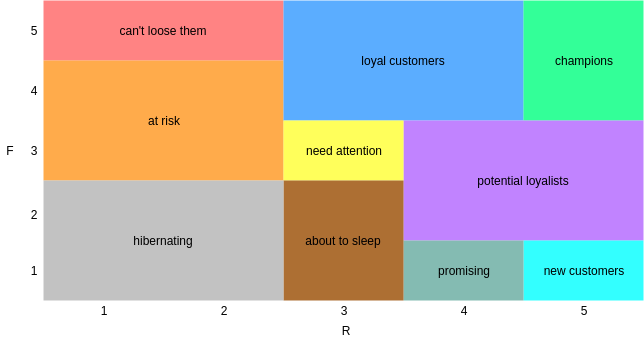

RFM analizinde esas olarak kullanılan tablo ekte gösterdiğim tablodur. Bu tabloda R ve F değerleri üzerinden bir analiz gerçekleştirilir. Buna ek olarak Monetary değerlerinide ekleyerek bir analiz gerçekleştirilebilir. Ancak yukarda da belirtdiğim gibi veri setimde monetary değerlerinde sıkıntı olduğu için ben sadece R ve F değerlerini kullanarak bir segmentasyon yapacağım. Bunun için öncelikle RF değerlerini birleştirip ayrı bir sutun olarak ekliyorum

In [123]:
RF_scores = RFM_Scores$R_Score*10+RFM_Scores$F_Score

RFM_Scores$RF_Scores = RF_scores

head(RFM_Scores)

,Customer.ID,R_Score,F_Score,M_Score,RF_Scores
,<int>,<int>,<int>,<int>,<dbl>
1,12346,4,2,5,42
2,12347,2,4,5,24
3,12348,2,2,3,22
4,12349,1,4,4,14
5,12350,4,1,1,41
6,12351,4,2,1,42


Şimdi ise yukarda gösterdiğim tablo skorlarına göre kendi veri setimi düzenliyorum.  

In [71]:
Cant_lose = c(15,25)
At_Risk = c(13,14,23,24)
Hibernating = c(11,12,21,22)
About_To_Sleep = c(31,32)
Need_Attention = 33
Loyal_Customers = c(34,35,44,45)
Promising = 41
New_Customer = 51
Potential_Loyalists = c(42,43,52,53)
Champions = c(54,55)

1.   Can't lose them segmenti

In [131]:
for(i in 1:length(Cant_lose)){
  for(k in 1:nrow(RFM_Scores)){
    if(RFM_Scores$RF_Scores[k]==Cant_lose[i]){
      RFM_Scores$RF_Scores[k] = "Cant'lose them"
    }
  }
}

2. At Risk segmenti

In [132]:
for(i in 1:length(At_Risk)){
  for(k in 1:nrow(RFM_Scores)){
    if(RFM_Scores$RF_Scores[k]==At_Risk[i]){
      RFM_Scores$RF_Scores[k] = "At Risk"
    }
  }
}

3. Hibernating segmenti

In [133]:
for(i in 1:length(Hibernating)){
  for(k in 1:nrow(RFM_Scores)){
    if(RFM_Scores$RF_Scores[k]==Hibernating[i]){
      RFM_Scores$RF_Scores[k] = "Hibernating"
    }
  }
}

4. About To Sleep segmenti

In [134]:
for(i in 1:length(About_To_Sleep)){
  for(k in 1:nrow(RFM_Scores)){
    if(RFM_Scores$RF_Scores[k]==About_To_Sleep[i]){
      RFM_Scores$RF_Scores[k] = "About To Sleep"
    }
  }
}

5. Need Attention segmenti

In [135]:
RFM_Scores$RF_Scores = ifelse(RFM_Scores$RF_Scores == 33, 
                              "Need Attention", RFM_Scores$RF_Scores)

6. Promising segmenti

In [136]:
RFM_Scores$RF_Scores = ifelse(RFM_Scores$RF_Scores == 41, 
                              "Promising", RFM_Scores$RF_Scores)

7. New Customer segmenti

In [137]:
RFM_Scores$RF_Scores = ifelse(RFM_Scores$RF_Scores == 51, 
                              "New Customer", RFM_Scores$RF_Scores)

8. Loyal Customers segmenti

In [138]:
Loyal_Customers = c(34,35,44,45)
for(i in 1:length(Loyal_Customers)){
  for(k in 1:nrow(RFM_Scores)){
    if(RFM_Scores$RF_Scores[k]==Loyal_Customers[i]){
      RFM_Scores$RF_Scores[k] = "Loyal Customers"
    }
  }
}

9. Potential Loyalists segmenti

In [139]:
Potential_Loyalists = c(42,43,52,53)
for(i in 1:length(Potential_Loyalists)){
  for(k in 1:nrow(RFM_Scores)){
    if(RFM_Scores$RF_Scores[k]==Potential_Loyalists[i]){
      RFM_Scores$RF_Scores[k] = "Potential Loyalists"
    }
  }
}

10. Champions segmenti

In [140]:
Champions = c(54,55)
for(i in 1:length(Champions)){
  for(k in 1:nrow(RFM_Scores)){
    if(RFM_Scores$RF_Scores[k]==Champions[i]){
      RFM_Scores$RF_Scores[k] = "Champions"
    }
  }
}

RFM tablomuzda gösterildiği gibi tüm müşterileri 10 segmente bölmüş bulunmaktayız. Şimdi müşterileri ve hangi segmente aid oldukları bilgisini içeren bir data frame oluşturalım

In [142]:


New_df = data.frame(RFM_Scores$Customer.ID, RFM_Scores$RF_Scores)
colnames(New_df) = c("Customer", "Segments")
head(New_df)

,Customer,Segments
,<int>,<chr>
1,12346,Potential Loyalists
2,12347,At Risk
3,12348,Hibernating
4,12349,At Risk
5,12350,Promising
6,12351,Potential Loyalists


Artık müşteriler ve bulundukları segment bilgileri hazır. Bu veri seti üzerinden pazarlama departmanı belirli aksiyon ve kampanyalar düzenleyerek satışlarımızı artırabilir. 

Öneri ve görüşlerinizi esirgemeyin. Teşekkürler)